### data source : Students' Academic Performance Dataset

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv

----------------

## 0. 모듈 임포트

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

----------------

## 1. 데이터 호출

In [7]:
df = pd.read_csv('./data/xAPI-Edu-Data.csv')
df.tail()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L
479,F,Jordan,Jordan,MiddleSchool,G-08,A,History,S,Father,35,14,23,62,No,Bad,Above-7,L


### Attributes
1 Gender - student's gender (nominal: 'Male' or 'Female’)

2 Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’
Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

3 Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’
Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

4 Educational Stages- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

5 Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

6 Section ID- classroom student belongs (nominal:’A’,’B’,’C’)

7 Topic- course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

8 Semester- school year semester (nominal:’ First’,’ Second’)

9 Parent responsible for student (nominal:’mom’,’father’)

10 Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)

11- Visited resources- how many times the student visits a course content(numeric:0-100)

12 Viewing announcements-how many times the student checks the new announcements(numeric:0-100)

13 Discussion groups- how many times the student participate on discussion groups (numeric:0-100)

14 Parent Answering Survey- parent answered the surveys which are provided from school or not
(nominal:’Yes’,’No’)

15 Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Yes’,’No’)

16 Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)

----------------

# 2. EDA 및 기본 탐색

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [9]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [10]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [11]:
df['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

In [12]:
# KW : 쿠웨이트
df['NationalITy'].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
Lybia            6
USA              6
Iran             6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

In [13]:
df['PlaceofBirth'].value_counts()

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
USA             16
SaudiArabia     16
Palestine       10
Egypt            9
Tunis            9
Lybia            6
Syria            6
Iran             6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

### 수치형 데이터의 히스토그램 그리기

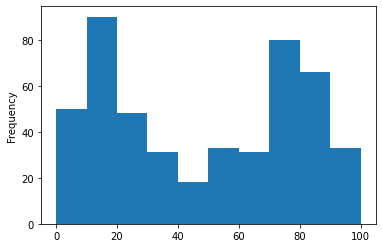

In [14]:
df['raisedhands'].plot.hist()

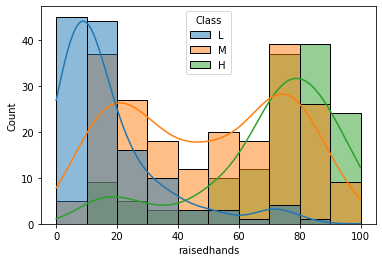

In [20]:
sns.histplot(data=df, x='raisedhands', hue='Class', hue_order=['L','M','H'], kde=True)

In [21]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


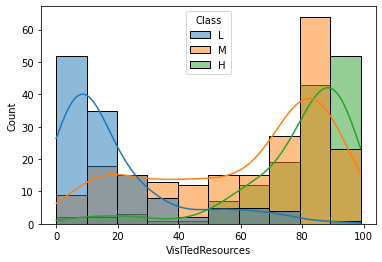

In [22]:
sns.histplot(data=df, x='VisITedResources', hue='Class', hue_order=['L','M','H'], kde=True)

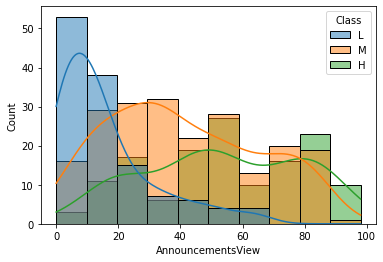

In [24]:
sns.histplot(data=df, x='AnnouncementsView', hue='Class', hue_order=['L','M','H'], kde=True)

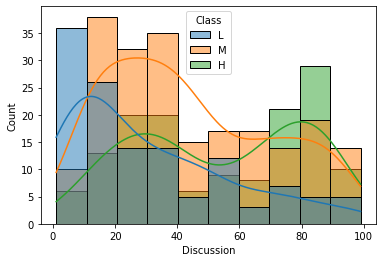

In [25]:
sns.histplot(data=df, x='Discussion', hue='Class', hue_order=['L','M','H'], kde=True)

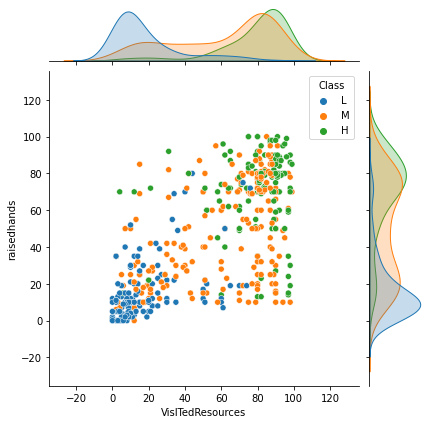

In [31]:
sns.jointplot(x='VisITedResources', y='raisedhands', data=df, hue='Class', hue_order=['L', 'M', 'H'])

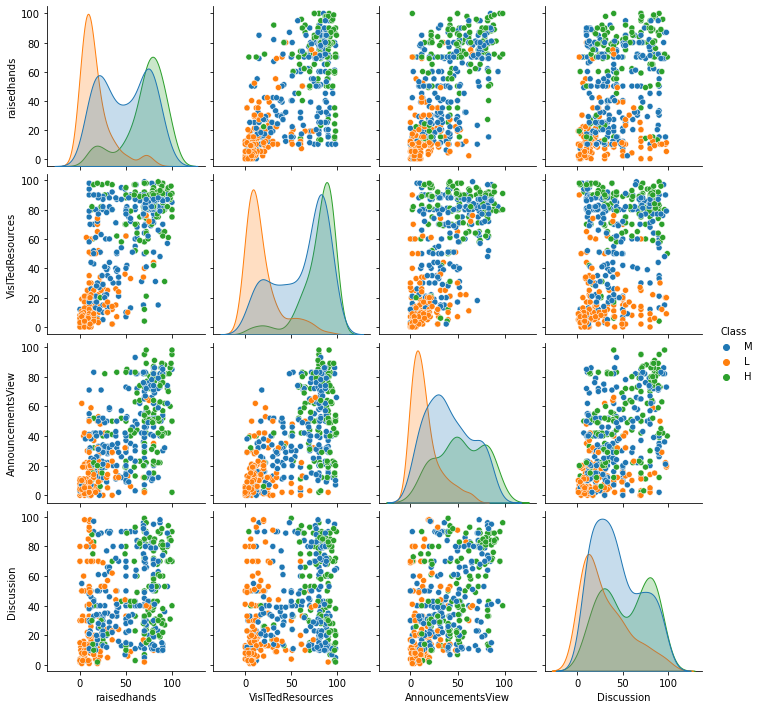

In [34]:
sns.pairplot(data=df, hue='Class')

- correlation은 분석 대상하고만 높은 수치를 나타내면 됨.
- feature들 끼리는 오히려 낮아야 좋음 - 더 다양하고 폭넓은 분석 적용이 가능하기 때문

# countplot을 통해 범주별 통계 확인하기

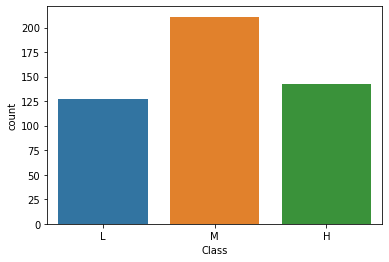

In [36]:
sns.countplot(x='Class', data=df, order=['L', 'M', 'H'])

In [37]:
df['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

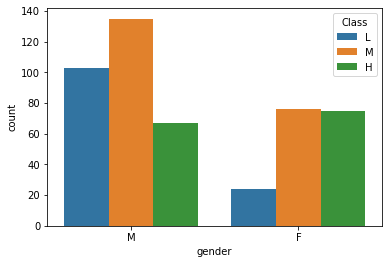

In [38]:
sns.countplot(x='gender', data=df, hue='Class', hue_order=['L', 'M', 'H'])

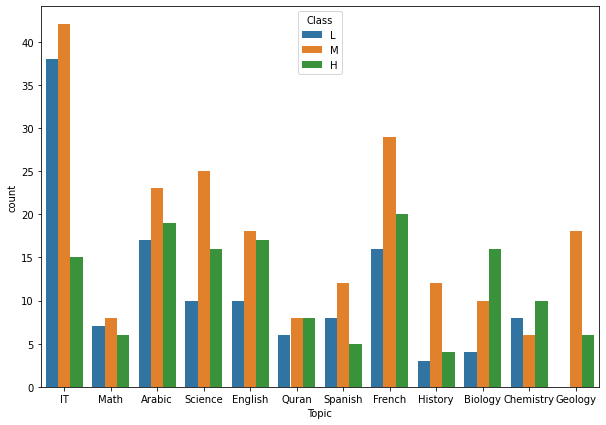

In [41]:
plt.figure(figsize=(10,7))
sns.countplot(x='Topic', data=df, hue='Class', hue_order=['L', 'M', 'H'])

# 범주형 대상 Class 컬럼을 수치로 바꾸어 표현하기

In [43]:
df['Class_value'] = df['Class'].map(dict(L=-1, M=0, H=1))
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_value
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,-1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,-1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0


In [46]:
gb_gender = df.groupby('gender').mean()['Class_value']
gb_gender

gender
F    0.291429
M   -0.118033
Name: Class_value, dtype: float64

<BarContainer object of 2 artists>

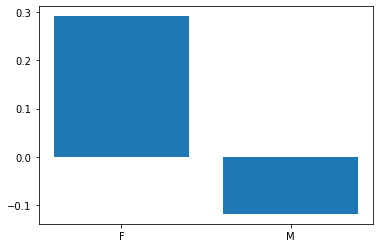

In [50]:
plt.bar(gb_gender.index, gb_gender)

In [52]:
gb_gender = df.groupby('Topic').mean()['Class_value']
gb_gender

Topic
Arabic       0.033898
Biology      0.400000
Chemistry    0.083333
English      0.155556
French       0.061538
Geology      0.250000
History      0.052632
IT          -0.242105
Math        -0.047619
Quran        0.090909
Science      0.117647
Spanish     -0.120000
Name: Class_value, dtype: float64

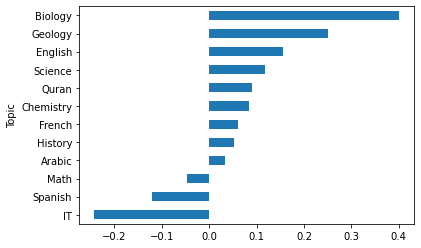

In [57]:
gb_gender.sort_values().plot.barh()

In [58]:
gb_gender = df.groupby('StudentAbsenceDays').mean()['Class_value']
gb_gender

StudentAbsenceDays
Above-7   -0.586387
Under-7    0.439446
Name: Class_value, dtype: float64

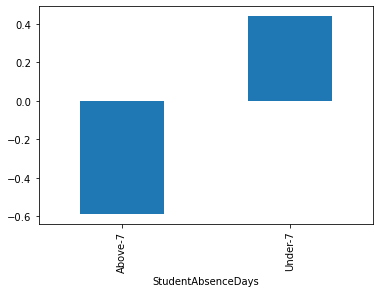

In [60]:
gb_gender.sort_values().plot.bar()

In [ ]:
regression
classification 차이

---------------

# 3. 모델 학습을 위한 전처리

In [120]:
print(df.shape)
df.columns

(480, 18)


Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Class_value'],
      dtype='object')

In [122]:
df_object = df.select_dtypes(include='object') # 카테고리형
df_num = df.select_dtypes(exclude='object') # 숫자형

print('df_num : ', df_num.shape)
print('df_object', df_object.shape)
df_object.head()

df_num :  (480, 5)
df_object (480, 13)


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M


In [123]:
del df_object['ParentschoolSatisfaction']
del df_object['Class']

del df_num['Class_value']

In [128]:
df_object = pd.get_dummies(df_object, drop_first=True)
#multicollinearity : 로지스틱 리그레션을 더 잘 학습시키기 위해서 drop_first=True 적용해야


X = pd.merge(df_num, df_object, left_index=True, right_index=True)

y = df['Class']

In [131]:
print(X.shape)
X.head()

(480, 59)


,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,StudentAbsenceDays_Under-7
0,15,16,2,20,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
1,20,20,3,25,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
2,10,7,0,30,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,30,25,5,35,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,40,50,12,50,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


# 학습데이터와 테스트데이터 분리하기

In [80]:
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# 모델 학습시키기

In [92]:
from sklearn.linear_model import LogisticRegression

In [139]:
# model_lr = LogisticRegression()
model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [140]:
pred = model_lr.predict(X_test)
# print(classification_report(y_test, pred))

In [169]:
print(classification_report(y_test, pred))

NameError: name 'classification_report' is not defined

In [142]:
print('테스트 세트 정확도 : {:.5f}'.format(model_lr.score(X_test, y_test)))

테스트 세트 정확도 : 0.70139


In [97]:
model_lr.predict(X_test)

array(['H', 'H', 'L', 'L', 'M', 'M', 'H', 'L', 'H', 'L', 'L', 'M', 'H',
       'M', 'H', 'H', 'L', 'L', 'H', 'L', 'M', 'H', 'M', 'M', 'H', 'H',
       'M', 'M', 'L', 'H', 'H', 'H', 'H', 'M', 'H', 'M', 'M', 'M', 'M',
       'L', 'H', 'M', 'M', 'L', 'M', 'L', 'M', 'H', 'L', 'M', 'M', 'M',
       'L', 'L', 'H', 'H', 'M', 'M', 'H', 'M', 'M', 'H', 'L', 'L', 'M',
       'M', 'M', 'M', 'M', 'H', 'M', 'M', 'H', 'L', 'L', 'M', 'H', 'H',
       'M', 'H', 'L', 'L', 'L', 'H', 'H', 'L', 'M', 'M', 'H', 'M', 'M',
       'H', 'M', 'M', 'H', 'M', 'L', 'L', 'M', 'M', 'H', 'M', 'H', 'M',
       'M', 'H', 'L', 'M', 'M', 'H', 'L', 'H', 'M', 'H', 'M', 'H', 'H',
       'L', 'H', 'H', 'M', 'L', 'L', 'L', 'M', 'L', 'M', 'M', 'M', 'M',
       'M', 'H', 'L', 'M', 'M', 'L', 'H', 'H', 'M', 'L', 'L', 'L', 'M',
       'H'], dtype=object)

In [103]:
from xgboost import XGBClassifier

In [143]:
model_xgb = XGBClassifier()

model_xgb.fit(X_train, y_train)

[22:42:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\44455\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [144]:
print('테스트 세트 정확도 : {:.2f}'.format(model_xgb.score(X_test, y_test)))

테스트 세트 정확도 : 0.74


# Logistic Regression 모델 계수로 상관성 파악하기

In [145]:
model_lr.coef_.shape

# (y의 클래스, 학습에 사용한 feature)

(3, 59)

In [146]:
model_lr.classes_

array(['H', 'L', 'M'], dtype=object)

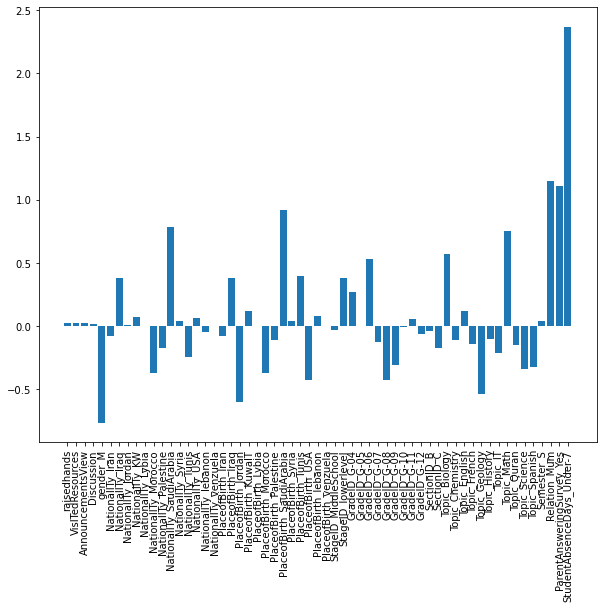

In [159]:
plt.figure(figsize=(10,8))
plt.bar(X.columns, model_lr.coef_[0,:])   # 첫 번째꺼(H 클래스)만 모두를 출력한다는 뜻
plt.xticks(rotation=90)
plt.show()

#### StudentAbsenceDays_Under-7, Relation_Mum 이 H클래스 예측을 위한 가장 영향력 있는 피쳐로 작용했었음

- 어떤 피쳐가 어떤 영향을 줬는지 확인가능

## XGBoost 확인하기

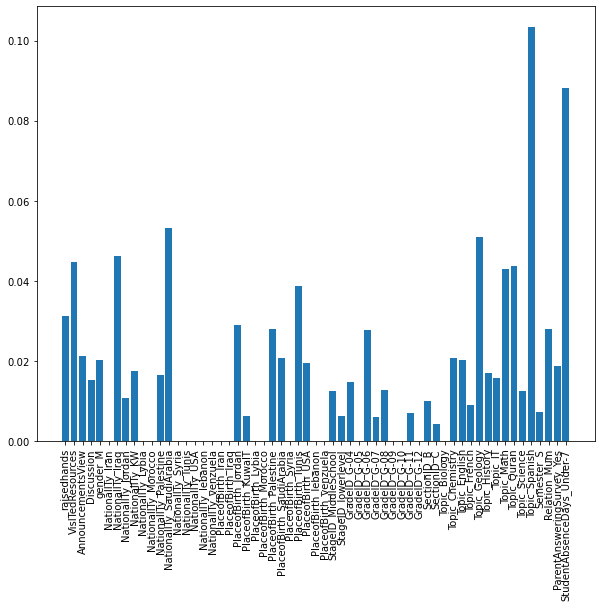

In [166]:
# model_xgb.coef_ 기능 없음
# model_xgb.feature_importances_  사용

plt.figure(figsize=(10,8))
plt.bar(X.columns, model_xgb.feature_importances_)   # 첫 번째꺼(H 클래스)만 모두를 출력한다는 뜻
plt.xticks(rotation=90)
plt.show()



In [167]:
model_xgb.feature_importances_

array([0.03134477, 0.04464767, 0.02127861, 0.01534108, 0.02017269,
       0.        , 0.04618599, 0.01071577, 0.01749749, 0.        ,
       0.        , 0.01652083, 0.05330155, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0290316 , 0.00641173, 0.        , 0.        , 0.02803531,
       0.02085355, 0.        , 0.03869732, 0.01946296, 0.        ,
       0.        , 0.01247641, 0.00623477, 0.01468625, 0.        ,
       0.02771669, 0.00616407, 0.01273184, 0.        , 0.        ,
       0.00700499, 0.        , 0.00995926, 0.0043883 , 0.        ,
       0.02087621, 0.02026085, 0.0090016 , 0.05095758, 0.01696707,
       0.01580271, 0.04298159, 0.04385722, 0.01261883, 0.10333955,
       0.00742363, 0.02794829, 0.01885458, 0.0882488 ], dtype=float32)

# 성적을 낮게 하는 요소 파악하기

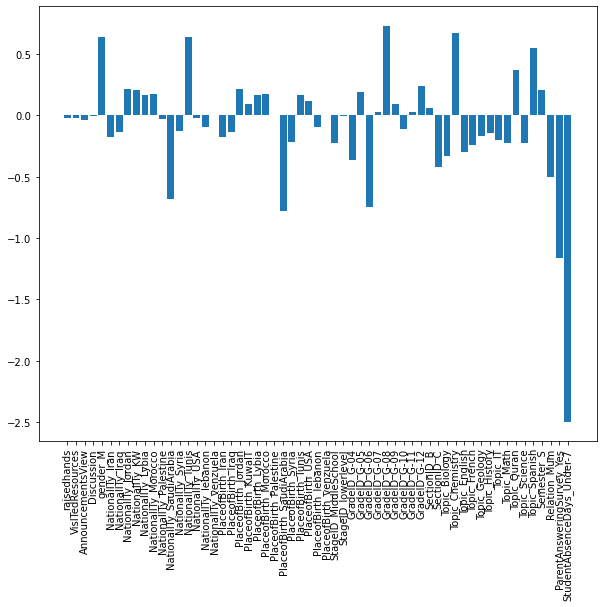

In [168]:
plt.figure(figsize=(10,8))
plt.bar(X.columns, model_lr.coef_[1,:])   # 첫 번째꺼(H 클래스)만 모두를 출력한다는 뜻
plt.xticks(rotation=90)
plt.show()

- 화학 전공생들의 성적이 안좋음
- discusion에 많이 참석 했지만 성적은 오히려 낮음